In [1]:
import pandas as pd
import datetime
import numpy as np

In [2]:
df_begin=pd.read_csv('D:\\KULIAH\\teep\AI\\dataset\\52 cells\\CellReports.csv')
df_begin

,timestamp,Viavi.Cell.Name,DRB.UEThpDl,DRB.UEThpUl,RRU.PrbUsedDl,RRU.PrbUsedUl,RRU.PrbAvailDl,RRU.PrbAvailUl,RRU.PrbTotUl,RRU.PrbTotDl,RRU.MaxLayerDlMimo,CARR.AverageLayersDl,RRC.ConnMean,RRC.ConnMax,QosFlow.TotPdcpPduVolumeUl,QosFlow.TotPdcpPduVolumeDl,PEE.AvgPower,PEE.Energy
0,1672502400,S1/B2/C1,0.278192,0.278192,81.459016,81.459016,100,100,81.459016,81.459016,0.0,0.0,1.786885,2.311475,277.868853,277.868853,281.947679,0.004195
1,1672502400,S7/B2/C1,0.146310,0.146310,50.000000,50.000000,100,100,50.000000,50.000000,0.0,0.0,0.516667,1.316667,146.050000,146.050000,180.817352,0.002292
2,1672502400,S8/B2/C1,0.220303,0.220303,64.300000,64.300000,100,100,64.300000,64.300000,0.0,0.0,1.450000,3.966667,220.083333,220.083333,230.893458,0.004631
3,1672502400,S9/B2/C1,0.186428,0.186428,80.900000,80.900000,100,100,80.900000,80.900000,0.0,0.0,1.916667,6.900000,186.083333,186.083333,279.584476,0.005326
4,1672502400,S1/B13/C1,0.000000,0.000000,0.000000,0.000000,75,75,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,18.250000,0.000360
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
524206,1673107140,S3/N77/C2,0.000000,0.000000,0.000000,0.000000,273,273,0.000000,0.000000,0.0,0.0,0.000000,4.000000,0.000000,0.000000,21.000000,11.000064
524207,1673107140,S3/N77/C3,0.000000,0.000000,0.000000,0.000000,273,273,0.000000,0.000000,0.0,0.0,0.000000,2.000000,0.000000,0.000000,21.000000,7.609575
524208,1673107140,S4/N77/C1,0.000000,0.000000,0.000000,0.000000,273,273,0.000000,0.000000,0.0,0.0,0.000000,3.000000,0.000000,0.000000,21.000000,7.789410
524209,1673107140,S4/N77/C2,0.000000,0.000000,0.000000,0.000000,273,273,0.000000,0.000000,0.0,0.0,0.000000,5.000000,0.000000,0.000000,21.000000,18.617635


In [3]:
df_1= df_begin.drop(columns=['RRU.PrbTotUl', 'RRU.PrbTotDl']).copy()
convert_time=pd.to_datetime(df_1['timestamp'], unit='s',origin='unix')
df_1.insert(df_1.columns.get_loc('timestamp') + 1, 'datetime_column', convert_time)
df_1.insert(df_1.columns.get_loc('datetime_column') + 1, 'second', df_1['datetime_column'].dt.second)
df_1.insert(df_1.columns.get_loc('datetime_column') + 2, 'minute', df_1['datetime_column'].dt.minute)
df_1.insert(df_1.columns.get_loc('datetime_column') + 3, 'hour', df_1['datetime_column'].dt.hour)
df_1.insert(df_1.columns.get_loc('datetime_column') + 4, 'day', df_1['datetime_column'].dt.day)
df_1.insert(df_1.columns.get_loc('datetime_column') + 5, 'month', df_1['datetime_column'].dt.month)

In [4]:
df_1

,timestamp,datetime_column,second,minute,hour,day,month,Viavi.Cell.Name,DRB.UEThpDl,DRB.UEThpUl,...,RRU.PrbAvailDl,RRU.PrbAvailUl,RRU.MaxLayerDlMimo,CARR.AverageLayersDl,RRC.ConnMean,RRC.ConnMax,QosFlow.TotPdcpPduVolumeUl,QosFlow.TotPdcpPduVolumeDl,PEE.AvgPower,PEE.Energy
0,1672502400,2022-12-31 16:00:00,0,0,16,31,12,S1/B2/C1,0.278192,0.278192,...,100,100,0.0,0.0,1.786885,2.311475,277.868853,277.868853,281.947679,0.004195
1,1672502400,2022-12-31 16:00:00,0,0,16,31,12,S7/B2/C1,0.146310,0.146310,...,100,100,0.0,0.0,0.516667,1.316667,146.050000,146.050000,180.817352,0.002292
2,1672502400,2022-12-31 16:00:00,0,0,16,31,12,S8/B2/C1,0.220303,0.220303,...,100,100,0.0,0.0,1.450000,3.966667,220.083333,220.083333,230.893458,0.004631
3,1672502400,2022-12-31 16:00:00,0,0,16,31,12,S9/B2/C1,0.186428,0.186428,...,100,100,0.0,0.0,1.916667,6.900000,186.083333,186.083333,279.584476,0.005326
4,1672502400,2022-12-31 16:00:00,0,0,16,31,12,S1/B13/C1,0.000000,0.000000,...,75,75,0.0,0.0,0.000000,0.000000,0.000000,0.000000,18.250000,0.000360
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
524206,1673107140,2023-01-07 15:59:00,0,59,15,7,1,S3/N77/C2,0.000000,0.000000,...,273,273,0.0,0.0,0.000000,4.000000,0.000000,0.000000,21.000000,11.000064
524207,1673107140,2023-01-07 15:59:00,0,59,15,7,1,S3/N77/C3,0.000000,0.000000,...,273,273,0.0,0.0,0.000000,2.000000,0.000000,0.000000,21.000000,7.609575
524208,1673107140,2023-01-07 15:59:00,0,59,15,7,1,S4/N77/C1,0.000000,0.000000,...,273,273,0.0,0.0,0.000000,3.000000,0.000000,0.000000,21.000000,7.789410
524209,1673107140,2023-01-07 15:59:00,0,59,15,7,1,S4/N77/C2,0.000000,0.000000,...,273,273,0.0,0.0,0.000000,5.000000,0.000000,0.000000,21.000000,18.617635


In [5]:
seleted_columns = ['datetime_column','RRU.PrbUsedDl', 'RRU.PrbUsedUl']
df_2= df_1[seleted_columns].copy()

In [6]:
#  Convert 'datetime_column' to datetime format if it's not already
df_2['datetime_column'] = pd.to_datetime(df_2['datetime_column'])

# Set 'datetime_column' as the index
df_2.set_index('datetime_column', inplace=True)

# Resample by minute and calculate the mean
try:
    df_3= df_2.resample('T').max().drop(columns=['Viavi.Cell.Name'])
except:
    df_3= df_2.resample('T').max()

df_3

,RRU.PrbUsedDl,RRU.PrbUsedUl
datetime_column,,
2022-12-31 16:00:00,125.483333,118.30
2022-12-31 16:01:00,125.983333,122.85
2022-12-31 16:02:00,123.616667,113.75
2022-12-31 16:03:00,120.216667,109.20
2022-12-31 16:04:00,150.150000,145.60
...,...,...
2023-01-07 15:55:00,163.800000,150.15
2023-01-07 15:56:00,109.200000,104.65
2023-01-07 15:57:00,136.500000,136.50


In [7]:
df_final=df_3.astype(float).copy()
print(df_final.shape)

y_train=df_final[['RRU.PrbUsedDl', 'RRU.PrbUsedUl']].loc['2022-12-31':'2023-01-06']
#x_train=df_final.loc['2022-12-31':'2023-01-06'].drop(columns=['RRU.PrbUsedDl', 'RRU.PrbUsedUl'])
x_train=df_final.loc['2022-12-31':'2023-01-06']

y_validation=df_final[['RRU.PrbUsedDl', 'RRU.PrbUsedUl']].loc['2023-01-07':].iloc[:-2]
# x_validation = df_final.loc['2023-01-07':].drop(columns=['RRU.PrbUsedDl', 'RRU.PrbUsedUl']).iloc[:-2]
x_validation = df_final.loc['2023-01-07':].iloc[:-2]
print("shape y_train:", y_train.shape, "shape x_train:", x_train.shape, "shape y_validation:", y_validation.shape, "shape x_validation:", x_validation.shape)

(10080, 2)
shape y_train: (9120, 2) shape x_train: (9120, 2) shape y_validation: (958, 2) shape x_validation: (958, 2)


In [8]:
x_train

,RRU.PrbUsedDl,RRU.PrbUsedUl
datetime_column,,
2022-12-31 16:00:00,125.483333,118.300000
2022-12-31 16:01:00,125.983333,122.850000
2022-12-31 16:02:00,123.616667,113.750000
2022-12-31 16:03:00,120.216667,109.200000
2022-12-31 16:04:00,150.150000,145.600000
...,...,...
2023-01-06 23:55:00,98.066667,98.066667
2023-01-06 23:56:00,168.350000,127.400000
2023-01-06 23:57:00,182.883333,182.000000


In [9]:
from sklearn.preprocessing import  StandardScaler
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import tensorflow as tf
def scaler_data(data): 
    scaler = StandardScaler()
    data_scaled= scaler.fit_transform(data)
    return data_scaled, scaler


def split_input_to_timestep(data, timestep):
    x_dictionary = {}
    for i in range(0,data.shape[1]):
        x_dictionary['x%d'%i] = [data[_:_+timestep, i] for _ in range(data.shape[0] - timestep)]
    x_final =np.stack(list(x_dictionary.values()), axis=2)
    return x_final

def tensorflow_lstm(X_train_scaled, Y_train_scaled, X_validation_scaled, Y_validation_scaled, 
                    learning_rate, target_MAE,  jumlah_epochs, jumlah_sampel_batch,
                    jumlah_epoch_terbelakang,  save_best_model_path, validation_data=False,load_model=None):
    global model
    class MAEStopCallback(tf.keras.callbacks.Callback):
        def __init__(self, threshold):
            super(MAEStopCallback, self).__init__()
            self.threshold = threshold

        def on_epoch_end(self, epoch, logs=None):
            if logs['mae'] < self.threshold:
                print(f"\nMAE reached below {self.threshold}. Stopping training.")
                self.model.stop_training = True


    time_step=X_train_scaled.shape[1]
    jumlah_fitur=X_train_scaled.shape[2]
    model = tf.keras.models.Sequential()
    if load_model==None:
        model.add(tf.keras.layers.LSTM(units=100, input_shape=(time_step, jumlah_fitur), return_sequences=True))
        #model.add(tf.keras.layers.Dropout(0.2))
        model.add(tf.keras.layers.LSTM(units=50, return_sequences=True))
        #model.add(tf.keras.layers.Dropout(0.1))
        model.add(tf.keras.layers.LSTM(units=50, return_sequences=False))
        #model.add(tf.keras.layers.Dropout(0.1))
        model.add(tf.keras.layers.Dense(50, activation='relu'))
        model.add(tf.keras.layers.Dense(2, activation='linear'))
    else:
        model = tf.keras.models.load_model(load_model)

    optimizer = tf.keras.optimizers.Nadam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='mse', metrics=['mse', 'mae'])
    mae_stop_callback = MAEStopCallback(threshold=target_MAE) 

    # Add ModelCheckpoint
    checkpoint_callback = ModelCheckpoint(
        save_best_model_path,
        monitor='val_mae',     
        mode='min',         # Mode is set to minimize the monitored quantity 
        save_best_only=True, # Only save the best model
        verbose=1            # Show messages about the model saving
    )
    # Add EarlyStopping 
    early_stopping_callback = EarlyStopping(
        monitor='val_mae',     
        mode='min',         # Mode is set to minimize the monitored quantity 
        patience=jumlah_epoch_terbelakang,    # Number of consecutive epochs with no improvement after which training will be stopped
        restore_best_weights=True,
        verbose=1            # Show messages about early stopping
    )

    if validation_data==True:
        model.fit(X_train_scaled, Y_train_scaled, epochs=jumlah_epochs, batch_size=jumlah_sampel_batch,  
                  callbacks=[mae_stop_callback, checkpoint_callback, early_stopping_callback], 
                  validation_data=(X_validation_scaled, Y_validation_scaled), validation_batch_size=jumlah_sampel_batch)
    else:
        model.fit(X_train_scaled, Y_train_scaled, epochs=jumlah_epochs, batch_size=jumlah_sampel_batch, 
                   callbacks=[mae_stop_callback, checkpoint_callback, early_stopping_callback])

    
    loss,MSE, MAE=model.evaluate(X_train_scaled, Y_train_scaled)
    print("loss: ",loss, "MSE: ", MSE, "MAE: ", MAE)
    
    return model,   loss,   MSE, MAE

In [10]:
x_train_scaled, x_train_scaler=scaler_data(x_train)
x_train_scaled= pd.DataFrame(x_train_scaled, columns=x_train.columns)
y_train_scaled, y_train_scaler=scaler_data(y_train)

x_validation_scaled, x_validation_scaler = scaler_data(x_validation)
x_validation_scaled = pd.DataFrame(x_validation_scaled, columns=x_validation.columns)
y_validation_scaled, y_validation_scaler = scaler_data(y_validation)

In [11]:
timestep=120
x_train_scaled_final= split_input_to_timestep(x_train_scaled.to_numpy(), timestep=timestep)
y_train_scaled_final=y_train_scaled[timestep:]
print("shape y_train after %d timestep:"%timestep, y_train_scaled_final.shape)
print("shape x_train after split into %d timestep:"%timestep, x_train_scaled_final.shape)

x_validation_scaled_final = split_input_to_timestep(x_validation_scaled.to_numpy(), timestep=timestep)
y_validation_scaled_final = y_validation_scaled[timestep:]
print("shape y_validation after %d timestep:" % timestep, y_validation_scaled_final.shape)
print("shape x_validation after split into %d timestep:" % timestep, x_validation_scaled_final.shape)

shape y_train after 120 timestep: (9000, 2)
shape x_train after split into 120 timestep: (9000, 120, 2)
shape y_validation after 120 timestep: (838, 2)
shape x_validation after split into 120 timestep: (838, 120, 2)


In [12]:
import datetime

# Get the current date and time
now = datetime.datetime.now()

# Format the date and time to a string
timestamp = now.strftime("%Y%m%d_%H%M")
timestamp

'20240715_1335'

In [13]:
model_lstm, loss, MSE, MAE      = tensorflow_lstm(x_train_scaled_final, y_train_scaled_final, x_validation_scaled_final, y_validation_scaled_final,
                                                  learning_rate=0.005, target_MAE=0.1,  jumlah_epochs=10, jumlah_sampel_batch=32, 
                                                  jumlah_epoch_terbelakang=3,  save_best_model_path = 'MAE_lowest_%s.hdf5'%timestamp, 
                                                  validation_data=True, load_model=None)

Epoch 1/10
282/282 [==============================] - ETA: 0s - loss: 1.0068 - mse: 1.0068 - mae: 0.8365
Epoch 1: val_mae improved from inf to 0.83958, saving model to MAE_lowest_20240715_1335.hdf5
282/282 [==============================] - 26s 81ms/step - loss: 1.0068 - mse: 1.0068 - mae: 0.8365 - val_loss: 0.9984 - val_mse: 0.9984 - val_mae: 0.8396
Epoch 2/10
282/282 [==============================] - ETA: 0s - loss: 1.0017 - mse: 1.0017 - mae: 0.8345
Epoch 2: val_mae did not improve from 0.83958
282/282 [==============================] - 23s 80ms/step - loss: 1.0017 - mse: 1.0017 - mae: 0.8345 - val_loss: 0.9983 - val_mse: 0.9983 - val_mae: 0.8412
Epoch 3/10
282/282 [==============================] - ETA: 0s - loss: 1.0011 - mse: 1.0011 - mae: 0.8348
Epoch 3: val_mae did not improve from 0.83958
282/282 [==============================] - 23s 83ms/step - loss: 1.0011 - mse: 1.0011 - mae: 0.8348 - val_loss: 0.9982 - val_mse: 0.9982 - val_mae: 0.8406
Epoch 4/10
282/282 [===============

In [14]:
nama_file='%s.hdf5'%timestamp
model_lstm.save(filepath=nama_file)

In [15]:
def model_tensorflow(time_step, jumlah_fitur, x_test, pilih_models):
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.LSTM(units=200, input_shape=(time_step, jumlah_fitur), return_sequences=True))
    model.add(tf.keras.layers.Dropout(0.3))
    model.add(tf.keras.layers.LSTM(units=100, return_sequences=True))
    model.add(tf.keras.layers.Dropout(0.2))
    model.add(tf.keras.layers.LSTM(units=50, return_sequences=False))
    model.add(tf.keras.layers.Dropout(0.1))
    model.add(tf.keras.layers.Dense(50, activation='relu'))
    model.add(tf.keras.layers.Dense(2, activation='linear'))

    model.load_weights(filepath=pilih_models)
    return model.predict(x_test)

In [16]:
hasil= model_tensorflow(time_step=60, jumlah_fitur=x_validation_scaled_final.shape[2], x_test=x_validation_scaled_final, pilih_models='MAE_lowest_20240708_1151.hdf5')

FileNotFoundError: [Errno 2] Unable to open file (unable to open file: name = 'MAE_lowest_20240708_1151.hdf5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [ ]:
predictions =   y_validation_scaler.inverse_transform(hasil)
actual      =   y_validation_scaler.inverse_transform(y_validation_scaled_final)
print("predictions.shape:", predictions.shape, "actual.shape:", actual.shape)

predictions.shape: (900, 2) actual.shape: (900, 2)


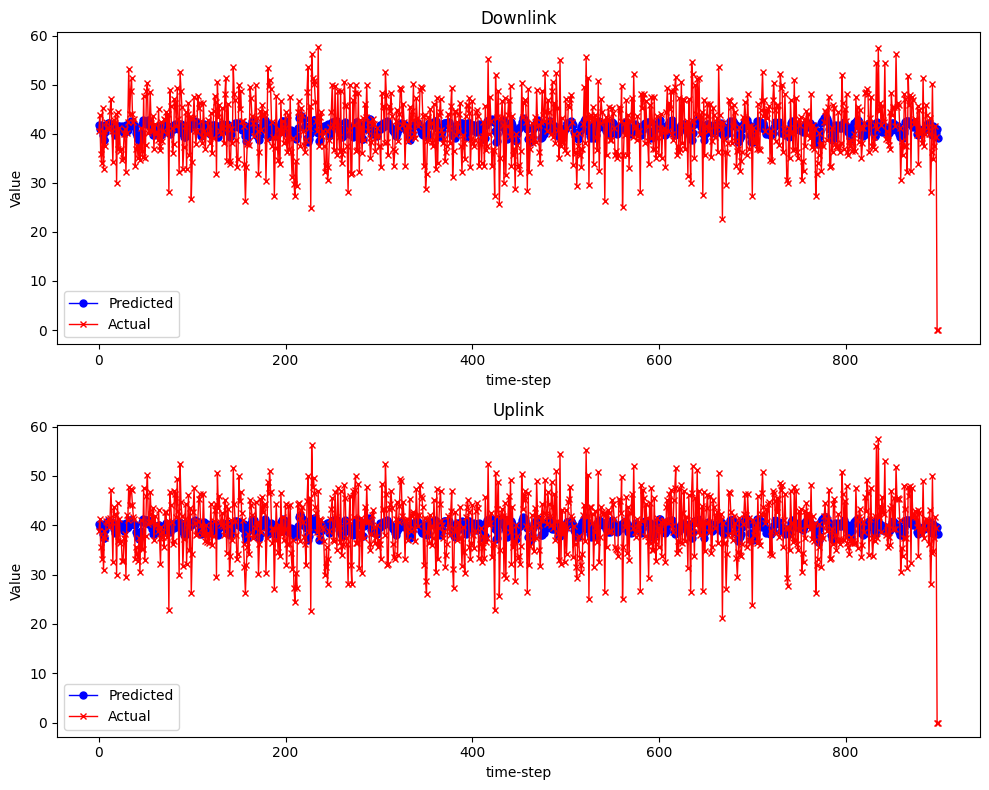

In [ ]:
import matplotlib.pyplot as plt

# Assuming predictions and actual are numpy arrays of shape (900, 2)
feature_names = ['Downlink', 'Uplink']

fig, axs = plt.subplots(2, 1, figsize=(10, 8))

for i in range(2):
    axs[i].plot(predictions[:, i], label='Predicted', color='blue', marker='o', linestyle='-', markersize=5, linewidth=1)
    axs[i].plot(actual[:, i], label='Actual', color='red', marker='x', linestyle='-', markersize=5, linewidth=1)
    axs[i].set_title(feature_names[i])
    axs[i].set_xlabel('time-step')
    axs[i].set_ylabel('Value')
    axs[i].legend()

plt.tight_layout()
plt.show()